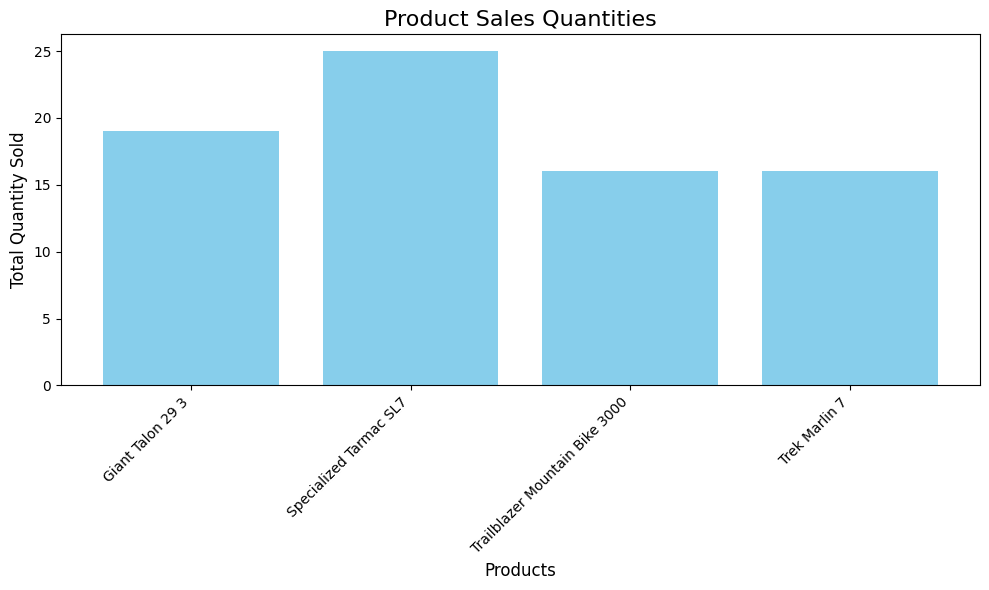

In [20]:
import os
import django
import asyncio
import matplotlib.pyplot as plt
from django.db.models import Sum
from asgiref.sync import sync_to_async
import nest_asyncio

nest_asyncio.apply()

os.chdir('D:\\Documents\\Vue-Django-Website\\storefront\\storefrontbike')

os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'storefrontbike.settings')
django.setup()

@sync_to_async
def get_order_items():
    return list(
        OrderItem.objects.values('product__title').annotate(total_quantity=Sum('quantity'))
    )

async def fetch_data():
    order_items = await get_order_items() 

    data = {item['product__title']: item['total_quantity'] for item in order_items}
    names = list(data.keys())
    values = list(data.values())

    plt.figure(figsize=(10, 6))
    plt.bar(names, values, color='skyblue')
    plt.title('Product Sales Quantities', fontsize=16)
    plt.xlabel('Products', fontsize=12)
    plt.ylabel('Total Quantity Sold', fontsize=12)
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()

# Run the async function
await fetch_data()




